<a href="https://colab.research.google.com/github/RahulSinghPundir/DBSCAN/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the essential libraies
import numpy as np
import pandas as pd

# REading the data
df=pd.read_csv("https://raw.githubusercontent.com/RahulSinghPundir/DBSCAN/main/weather-stations20140101-20141231.csv")
df.head()

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


In [2]:
# Removing the data which consit of null values
df=df[pd.notnull(df["Tm"])] # Drop all the rows which have null values
df=df.reset_index(drop=True) # Reset the index as when we delete the null rows index get disturb
df.head()

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573
4,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,...,8.0,NaN,NaN,12.0,NaN,NaN,NaN,258.6,0.0,1012710


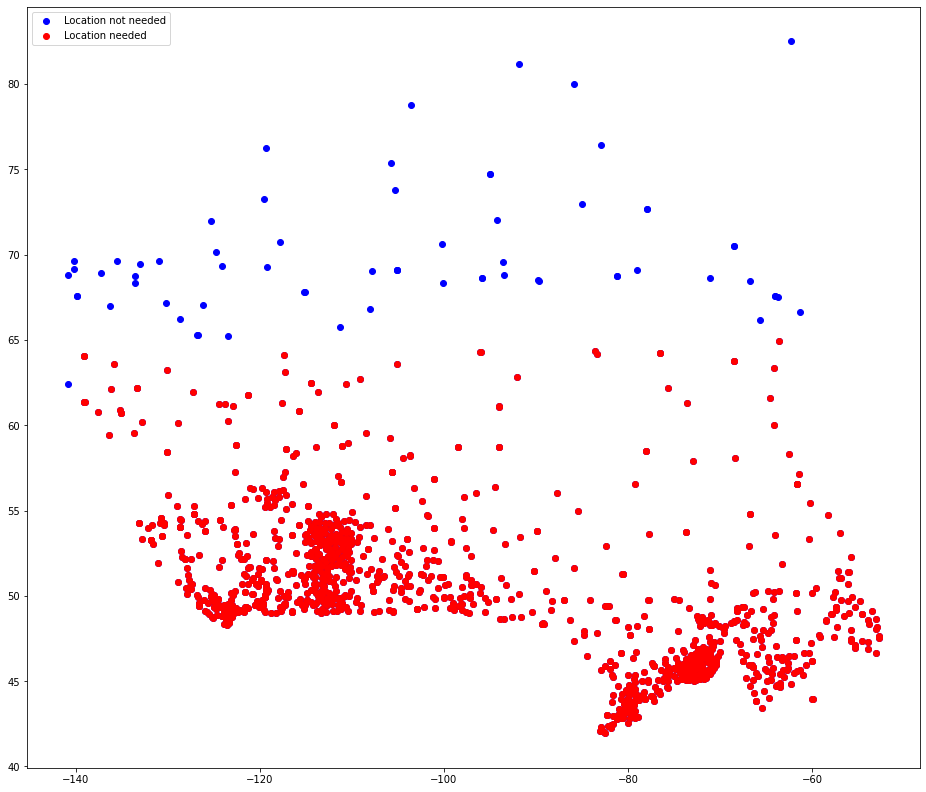

In [3]:
# Visulizing the data
import matplotlib.pyplot as plt
plt.figure(figsize=(16,14)) # This will decide the graph size
pdf=df[(df.Lat>40) & (df.Lat<65) & (df.Long>-140) & (df.Long<-50)] # pdf is dataframe which consist of location which is bounded by us
plt.scatter(df.Long,df.Lat,color='blue',marker='o',label='Location not needed') # Mark all the points(df) as blue
plt.scatter(pdf.Long,pdf.Lat,color='red',marker='o',label='Location needed') # mark points which is in pdf
plt.legend()
plt.show()

In [6]:

# !pip install basemap

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


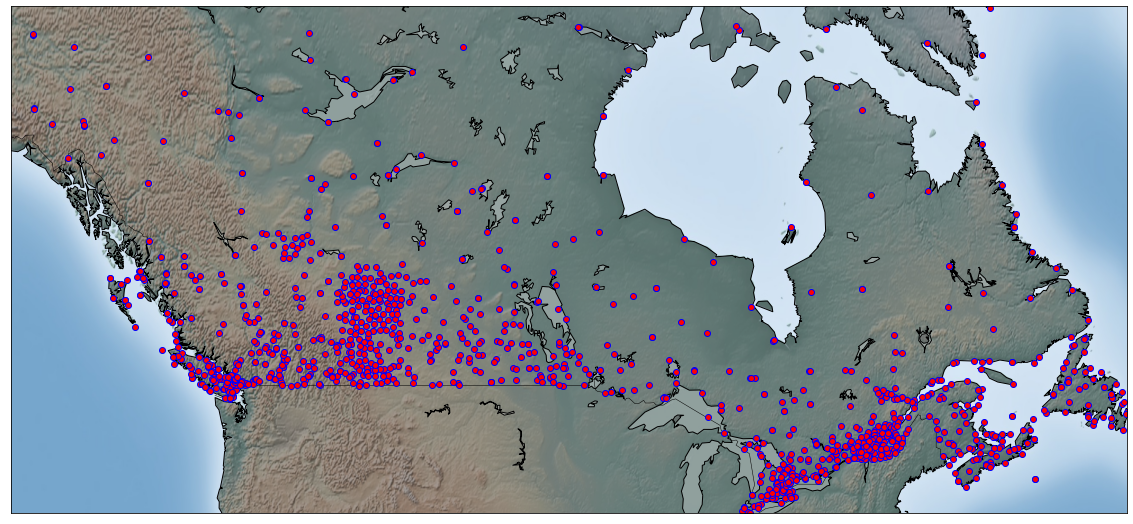

In [50]:
# Now creating the real map by mpl_toolkits
import mpl_toolkits
from mpl_toolkits.basemap import Basemap
fig=plt.figure(figsize=(20,15))
llon=min(df['Long']) # llon= Minimum longitude to plot the world
ulon=max(df['Long']) # ulon= Maximum longitude to plot the world
llat=min(df['Lat'])  # llat= Minimum latitude to plot the world
ulat=65              # ulat= Maximum latitude to plot the world

map=Basemap(projection='merc',resolution = 'l', area_thresh = 1000.0,llcrnrlon=llon, llcrnrlat=llat,urcrnrlon=ulon, urcrnrlat=ulat)
map.drawcoastlines() # Darwing the coastlines
map.drawcountries() # Drawing the countries
map.fillcontinents(color='black',alpha=0.3) # Filling the colors 
map.shadedrelief()

# Creating the co-ordinates and store in the new columns of pdf
xs,ys = map(np.asarray(pdf.Long), np.asarray(pdf.Lat)) # xs=longitude , ys=latitude
pdf['xm']= xs.tolist() # converting them in list
pdf['ym'] =ys.tolist()

# Map with the co-ordinate and vizualize yhe data
for item,row in pdf.iterrows():
  map.plot(row.xm,row.ym,color='blue',marker='o',markerfacecolor='red')

In [65]:
# importing the dbscan
from sklearn.cluster import DBSCAN
# importing the standard scaler for regularizing
from sklearn.preprocessing import StandardScaler
X=pdf[['xm','ym']] # This the dataset / feature we are consider
X=np.nan_to_num(X) # Converting if there is any string into num
scale=StandardScaler()
X=scale.fit_transform(X)
scan=DBSCAN(eps=0.15,min_samples=10)
scan.fit(X)
labels=scan.labels_ # Store the labels in label variable
pdf['label']=labels # create a new column name label to store label

# core_points are points by which are custer is made or point which have sufficent points in given radius(epsillon)
core_point=np.zeros_like(labels,dtype=bool) 
core_point[scan.core_sample_indices_]=True



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


6

In [73]:
# Nothing but finding the number of clusters here -1 is the out of location(we say not really)
print(set(labels))
cluster=len(set(labels))
print(cluster)
real_cluster=cluster-(1 if -1 in set(labels) else 0)
print(real_cluster)
pdf.head()

{0, 1, 2, 3, 4, -1}
6
5


,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No,xm,ym,label
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,12.0,NaN,NaN,NaN,273.3,0.0,1011500,1.904323e+06,1.109253e+06,0
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,12.0,NaN,NaN,NaN,307.0,0.0,1012040,1.860846e+06,1.090485e+06,0
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,11.0,NaN,NaN,NaN,168.1,0.0,1012055,1.869853e+06,1.091330e+06,0
3,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,11.0,NaN,NaN,NaN,267.7,0.0,1012573,1.905880e+06,1.075467e+06,0
4,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,...,12.0,NaN,NaN,NaN,258.6,0.0,1012710,1.938015e+06,1.024536e+06,0


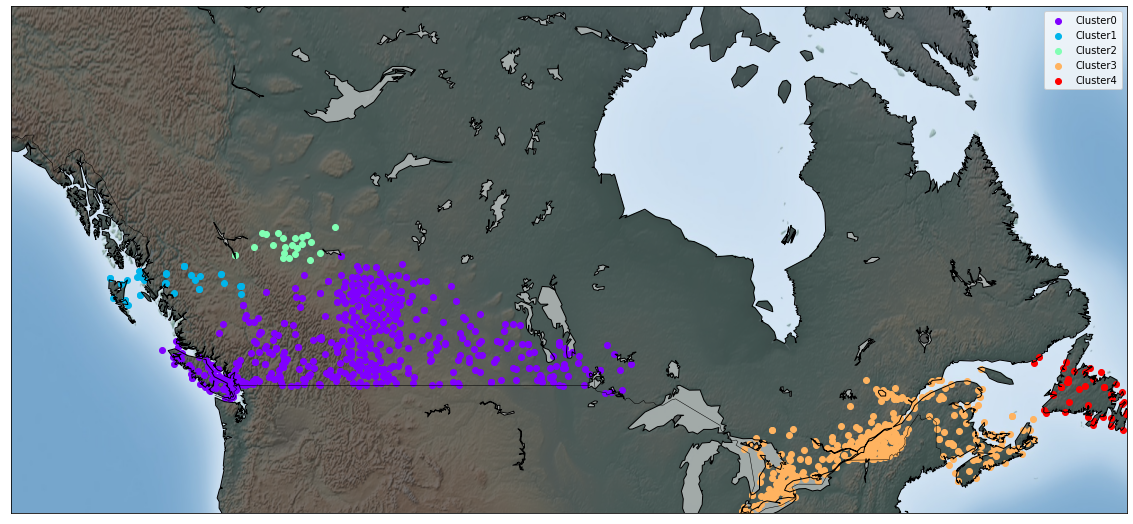

In [101]:
map=Basemap(projection='merc',resolution='l',llcrnrlat=llat,llcrnrlon=llon,urcrnrlat=ulat,urcrnrlon=ulon,area_thresh=1000)
plt.figure(figsize=(20,15))
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color='black',alpha=0.5)
map.shadedrelief()
from matplotlib import cm
colors=cm.rainbow(np.linspace(0,1,real_cluster))
for color,label in zip(colors,range(0,real_cluster)):
  sub=pdf[pdf['label']==label]
  map.scatter(sub.xm,sub.ym,color=color,label='Cluster'+str(label))
plt.legend()
plt.show()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


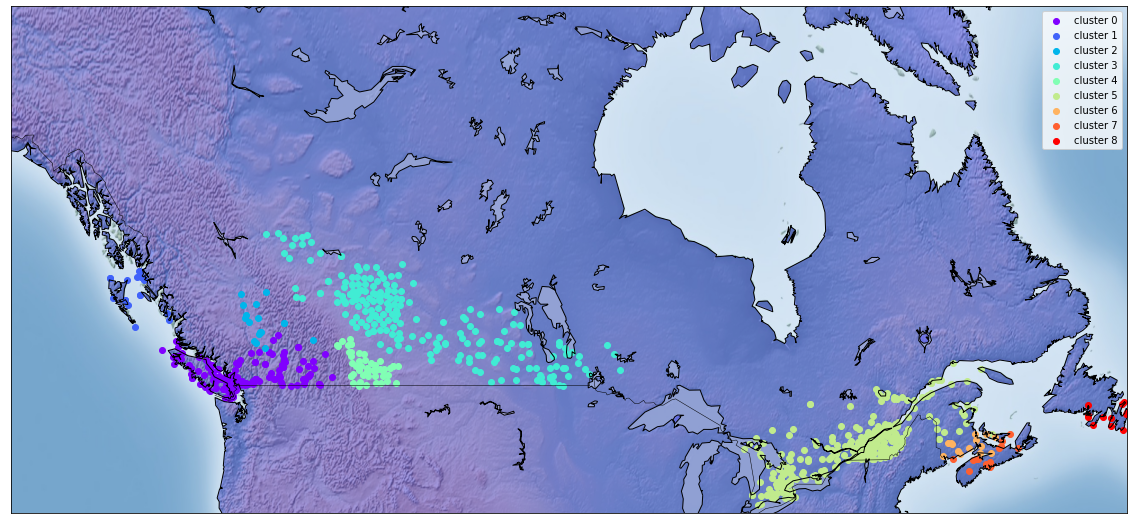

In [125]:
X=pdf[['xm','ym','Tm','Tx','Tn']]
X=scale.fit_transform(X)
X=np.nan_to_num(X)


scan = DBSCAN(eps=0.3, min_samples=10)
scan.fit(X)
label=scan.labels_
pdf['second_label']=label
set(label)
real_cluster=len(set(label))-(1 if -1 in label else 0)

plt.figure(figsize=(20,15))
map=Basemap(resolution='l',projection='merc',llcrnrlat=llat,llcrnrlon=llon,urcrnrlat=ulat,urcrnrlon=ulon,area_thresh=1000)
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color='blue',alpha=0.3)
map.shadedrelief()

colors=cm.rainbow(np.linspace(0,1,real_cluster))
for color,i in zip(colors,range(0,real_cluster)):
  sub=pdf[pdf["second_label"]==i]
  map.scatter(sub.xm,sub.ym,color=color,label='cluster '+str(i))
plt.legend()
plt.show()